In [1]:
import random 
import numpy as np 

random.seed(0)
np.random.seed(0)

def generate_data(length, k, save_path):
    if length < 3:
        raise ValueError("length must be greater than 2")
    if k == 0:
        raise ValueError("k must be greater than 0")
    base_examples = []
    for n1 in range(0, 10):
        for n2 in range(0, 10):
            seq = [n1, n2] + [0]*(length - 2)
            label = n1 + n2
            base_examples.append((seq, label))
    examples = base_examples
    examples = []
    for base_example in base_examples:
        for _ in range(k):
            idx = np.random.randint(2, length)
            val = np.random.randint(0, 10)
            seq = base_example[0].copy()
            label = base_example[1]
            seq[idx] = val
            examples.append((seq, label))
    save_dir = os.path.dirname(save_path)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    with open(save_path, "w", encoding="utf-8") as f:
        for example in examples:
            seq = [str(e) for e in example[0]]
            label = str(example[1])
            line = " ".join(seq) + "\t" + label + "\n"
            f.write(line)
    print(f"generate data to: {save_path}.")

In [5]:
lengths = [5, 10, 15, 20, 25, 30, 35]
for length in lengths:
    save_path = f"./data/{length}/train.txt"
    k = 3
    generate_data(length, k, save_path)
    save_path = f"./data/{length}/dev.txt"
    k = 1
    generate_data(length, k, save_path)
    save_path = f"./data/{length}/test.txt"
    k = 1
    generate_data(length, k, save_path)

generate data to: ./data/5/train.txt.
generate data to: ./data/5/dev.txt.
generate data to: ./data/5/test.txt.
generate data to: ./data/10/train.txt.
generate data to: ./data/10/dev.txt.
generate data to: ./data/10/test.txt.
generate data to: ./data/15/train.txt.
generate data to: ./data/15/dev.txt.
generate data to: ./data/15/test.txt.
generate data to: ./data/20/train.txt.
generate data to: ./data/20/dev.txt.
generate data to: ./data/20/test.txt.
generate data to: ./data/25/train.txt.
generate data to: ./data/25/dev.txt.
generate data to: ./data/25/test.txt.
generate data to: ./data/30/train.txt.
generate data to: ./data/30/dev.txt.
generate data to: ./data/30/test.txt.
generate data to: ./data/35/train.txt.
generate data to: ./data/35/dev.txt.
generate data to: ./data/35/test.txt.


In [2]:
import os 

def load_data(data_path):
    train_examples = []
    train_path = os.path.join(data_path, "train.txt")
    with open(train_path, "r", encoding="utf-8") as f:
        for line in f.readlines():
            items = line.strip().split("\t")
            seq = [int(item) for item in items[0].split(" ")]
            labe = int(items[1])
            train_examples.append((seq, labe))
    dev_examples = []
    dev_path = os.path.join(data_path, "dev.txt")
    with open(dev_path, "r", encoding="utf-8") as f:
        for line in f.readlines():
            items = line.strip().split("\t")    
            seq = [int(item) for item in items[0].split(" ")]
            labe = int(items[1])
            dev_examples.append((seq, labe))
    test_examples = []
    test_path = os.path.join(data_path, "test.txt")
    with open(test_path, "r", encoding="utf-8") as f:
        for line in f.readlines():
            items = line.strip().split("\t")
            seq = [int(item) for item in items[0].split(" ")]
            labe = int(items[1])
            test_examples.append((seq, labe))
    return train_examples, dev_examples, test_examples

In [3]:
length = 5
data_path = f"./data/{length}"
train_examples, dev_examples, test_examples = load_data(data_path)
print("dev example:", dev_examples[:2])
print("训练集数量：",len(train_examples))
print("验证集数量：",len(dev_examples))
print("测试集数量：",len(test_examples))

dev example: [([0, 0, 6, 0, 0], 0), ([0, 1, 0, 0, 8], 1)]
训练集数量： 300
验证集数量： 100
测试集数量： 100


In [4]:
from paddle.io import Dataset

class DigitSumDataset(Dataset):
    def __init__(self, data):
        self.data = data 

    def __getitem__(self, idx):
        example = self.data[idx]
        seq = paddle.to_tensor(example[0], dtype='int64')
        label = paddle.to_tensor(example[1], dtype='int64')
        return seq, label 
    
    def __len__(self):
        return len(self.data)

In [5]:
import paddle
import paddle.nn as nn 

class Embedding(nn.Layer):
    def __init__(self, num_embeddings, embedding_dim):
        super(Embedding, self).__init__()
        self.W = paddle.create_parameter(shape=[num_embeddings, embedding_dim], dtype='float32')

    def forward(self, inputs):
        embs = self.W[inputs]
        return embs 

In [6]:
emb_layer = Embedding(10, 5)
inputs = paddle.to_tensor([0,1,2,3])
emb_layer(inputs)

W0618 11:57:51.034153 107789 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 12.0, Runtime API Version: 11.8
W0618 11:57:51.035357 107789 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.


Tensor(shape=[4, 5], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[ 0.51371962, -0.38275146,  0.05090491, -0.33191586,  0.37016353],
        [-0.57332534, -0.15018222,  0.25262317, -0.03551254, -0.02105725],
        [-0.58318973, -0.22757313, -0.07556862,  0.14061661,  0.21822228],
        [ 0.38721415, -0.56293494,  0.27334633, -0.21182980, -0.27018255]])

In [7]:
import paddle 
import paddle.nn as nn
import paddle.nn.functional as F 

class SRN(nn.Layer):
    def __init__(self, input_size, hidden_size):
        super(SRN, self).__init__()
        self.input_size = input_size 
        self.hidden_size = hidden_size 
        self.W = paddle.create_parameter(shape=[input_size, hidden_size], dtype="float32")
        self.U = paddle.create_parameter(shape=[hidden_size, hidden_size], dtype="float32")
        self.b = paddle.create_parameter(shape=[1, hidden_size], dtype="float32")

    def init_state(self, batch_size):
        hidden_state = paddle.zeros(shape=[batch_size, self.hidden_size], dtype="float32")
        return hidden_state 

    def forward(self, inputs, hidden_state=None):
        batch_size, seq_len, input_size = inputs.shape 
        if hidden_state is None:
            hidden_state = self.init_state(batch_size)
        for step in range(seq_len):
            step_input = inputs[:, step, :]
            hidden_state = F.tanh(paddle.matmul(step_input, self.W)+paddle.matmul(hidden_state, self.U)+self.b)
        return hidden_state

In [9]:
class Model_RNN4SeqClass(nn.Layer):
    def __init__(self, model, num_digits, input_size, hidden_size, num_classes):
        super(Model_RNN4SeqClass, self).__init__()
        # 传入实例化的RNN层，例如SRN
        self.rnn_model = model
        # 词典大小
        self.num_digits = num_digits
        # 嵌入向量的维度
        self.input_size = input_size
        # 定义Embedding层
        self.embedding = Embedding(num_digits, input_size)
        # 定义线性层
        self.linear = nn.Linear(hidden_size, num_classes)

    def forward(self, inputs):
        # 将数字序列映射为相应向量
        inputs_emb = self.embedding(inputs)
        # 调用RNN模型
        hidden_state = self.rnn_model(inputs_emb)
        # 使用最后一个时刻的状态进行数字预测
        logits = self.linear(hidden_state)
        return logits

In [10]:
import os 
import random 
import paddle 
import numpy as np 
from nndl import Accuracy, RunnerV3
import paddle.io as io

np.random.seed(0)
random.seed(0)
paddle.seed(0)
num_digits = 10
input_size = 32 
hidden_size = 32
num_classes = 19
batch_size = 8

length = 10
print(f"\n===>Training SRN with data of length {length}.")
data_path = f"./data/{length}"
train_examples, dev_examples, test_examples = load_data(data_path)
train_set, dev_set, test_set = DigitSumDataset(train_examples), DigitSumDataset(dev_examples), DigitSumDataset(test_examples)
train_loader = io.DataLoader(train_set, batch_size=batch_size)
dev_loader = io.DataLoader(dev_set, batch_size=batch_size)
test_loader = io.DataLoader(test_set, batch_size=batch_size)

base_model = SRN(input_size, hidden_size)
model = Model_RNN4SeqClass(base_model, num_digits, input_size, hidden_size, num_classes)
optimizer = paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters())
metric = Accuracy()
loss_fn = nn.CrossEntropyLoss()

runner = RunnerV3(model, optimizer, loss_fn, metric)
save_dir = "./checkpoints"
model_save_path = os.path.join(save_dir, f"best_srn_model_{length}.pdparams")
runner.train(train_loader, dev_loader, num_epochs=100, eval_steps=100, log_steps=100, save_path=model_save_path)


===>Training SRN with data of length 10.
[Train] epoch: 0/100, step: 0/3800, loss: 2.98516
[Train] epoch: 2/100, step: 100/3800, loss: 2.59652
[Evaluate]  dev score: 0.12000, dev loss: 2.84987
[Evaluate] best accuracy performence has been updated: 0.00000 --> 0.12000
[Train] epoch: 5/100, step: 200/3800, loss: 2.26536
[Evaluate]  dev score: 0.07000, dev loss: 2.81978
[Train] epoch: 7/100, step: 300/3800, loss: 2.63965
[Evaluate]  dev score: 0.08000, dev loss: 2.78112
[Train] epoch: 10/100, step: 400/3800, loss: 2.47411
[Evaluate]  dev score: 0.09000, dev loss: 2.72431
[Train] epoch: 13/100, step: 500/3800, loss: 2.24435
[Evaluate]  dev score: 0.13000, dev loss: 2.59857
[Evaluate] best accuracy performence has been updated: 0.12000 --> 0.13000
[Train] epoch: 15/100, step: 600/3800, loss: 2.27838
[Evaluate]  dev score: 0.14000, dev loss: 2.45958
[Evaluate] best accuracy performence has been updated: 0.13000 --> 0.14000
[Train] epoch: 18/100, step: 700/3800, loss: 1.95722
[Evaluate]  dev

In [19]:
def train(length):
    print(f"\n===>Training SRN with data of length {length}.")
    data_path = f"./data/{length}"
    train_examples, dev_examples, test_examples = load_data(data_path)
    train_set, dev_set, test_set = DigitSumDataset(train_examples), DigitSumDataset(dev_examples), DigitSumDataset(test_examples)
    train_loader = io.DataLoader(train_set, batch_size=batch_size)
    dev_loader = io.DataLoader(dev_set, batch_size=batch_size)
    test_loader = io.DataLoader(test_set, batch_size=batch_size)

    base_model = SRN(input_size, hidden_size)
    model = Model_RNN4SeqClass(base_model, num_digits, input_size, hidden_size, num_classes)
    optimizer = paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters())
    metric = Accuracy()
    loss_fn = nn.CrossEntropyLoss()

    runner = RunnerV3(model, optimizer, loss_fn, metric)
    save_dir = "./checkpoints"
    model_save_path = os.path.join(save_dir, f"best_srn_model_{length}.pdparams")
    runner.train(train_loader, dev_loader, num_epochs=10, eval_steps=100, log_steps=100, save_path=model_save_path)
    return runner

In [20]:
srn_runners = {}

lengths = [10, 15, 20, 25, 30, 35]
for length in lengths:
    runner = train(length)
    srn_runners[length] = runner


===>Training SRN with data of length 10.
[Train] epoch: 0/10, step: 0/380, loss: 3.12942
[Train] epoch: 2/10, step: 100/380, loss: 2.83455
[Evaluate]  dev score: 0.08000, dev loss: 2.86026
[Evaluate] best accuracy performence has been updated: 0.00000 --> 0.08000
[Train] epoch: 5/10, step: 200/380, loss: 2.27649
[Evaluate]  dev score: 0.08000, dev loss: 2.83634
[Train] epoch: 7/10, step: 300/380, loss: 2.49771
[Evaluate]  dev score: 0.08000, dev loss: 2.82693
[Evaluate]  dev score: 0.10000, dev loss: 2.80855
[Evaluate] best accuracy performence has been updated: 0.08000 --> 0.10000
[Train] Training done!

===>Training SRN with data of length 15.
[Train] epoch: 0/10, step: 0/380, loss: 2.88197
[Train] epoch: 2/10, step: 100/380, loss: 2.71482
[Evaluate]  dev score: 0.12000, dev loss: 2.85054
[Evaluate] best accuracy performence has been updated: 0.00000 --> 0.12000
[Train] epoch: 5/10, step: 200/380, loss: 2.42325
[Evaluate]  dev score: 0.11000, dev loss: 2.82913
[Train] epoch: 7/10, s

In [21]:
print(srn_runners)

{10: <nndl.RunnerV3 object at 0x7f37f22d7370>, 15: <nndl.RunnerV3 object at 0x7f37f22d6380>, 20: <nndl.RunnerV3 object at 0x7f37f22d78e0>, 25: <nndl.RunnerV3 object at 0x7f380c2df430>, 30: <nndl.RunnerV3 object at 0x7f37f2338370>, 35: <nndl.RunnerV3 object at 0x7f380c135b40>}


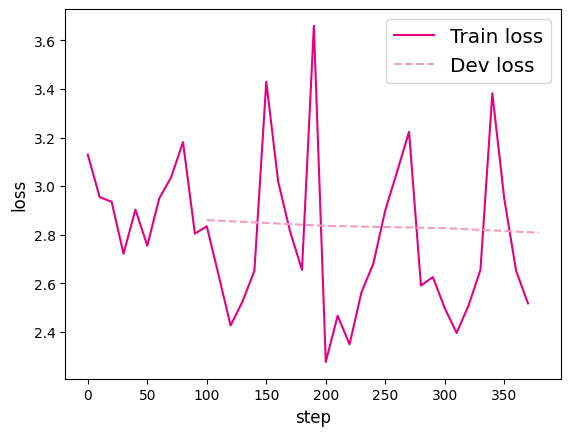

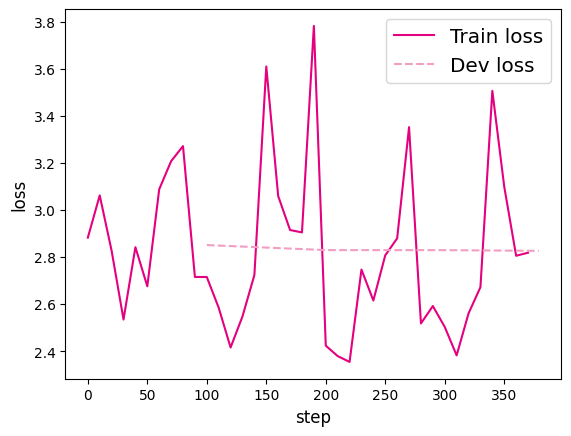

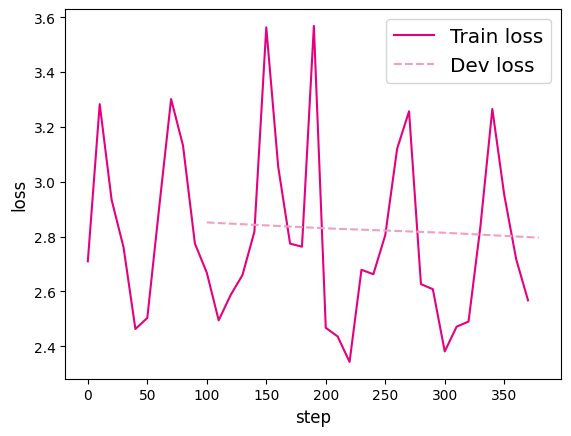

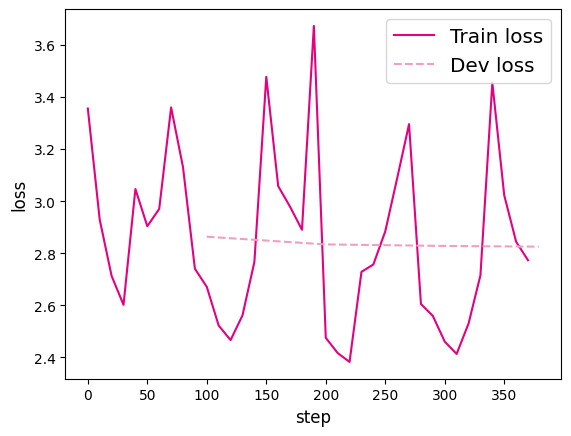

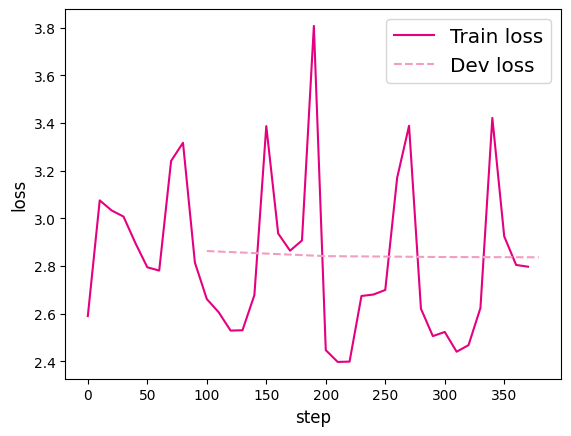

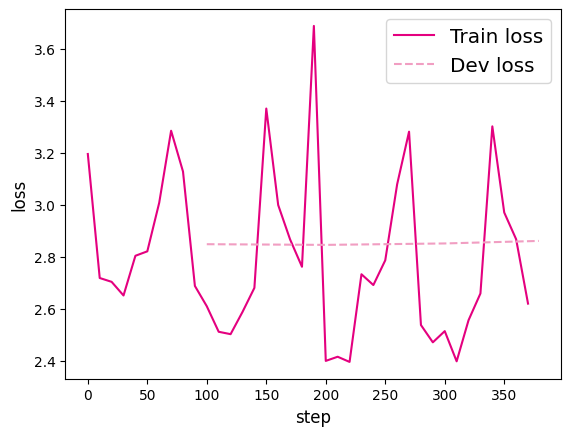

In [24]:
from nndl import plot_training_loss

for length in lengths:
    runner = srn_runners[length]
    fig_name = f"./images/{length}.pdf"
    plot_training_loss(runner, fig_name, sample_step=10)